## (Week01) 🌾曽呂利新左衛門

### 【問題1】100日目の米粒の数

In [1]:
# 報酬を貰う関数
def reward(init, days):
    accumulation = init
    reward_list = [init]
    accumulation_list = [init]
    
    for i in range(days-1):
        accumulation += accumulation*2
        reward_list.append(reward_list[-1]*2)
        accumulation_list.append(accumulation_list[-1] + reward_list[-1])
        
    return accumulation, reward_list, accumulation_list

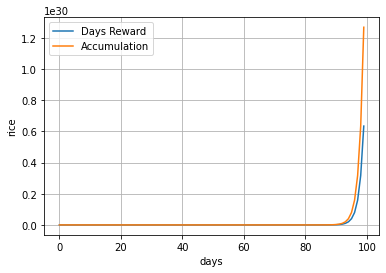

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 関数実行
init = 1
days= 100

res_reward1, res_reward2, res_reward3 = reward(init, days)

# print(res_reward1, '\n', '-'*20)
# print(res_reward2, '\n', '-'*20)
# print(res_reward3)

plt.title('')
plt.xlabel("days")
plt.ylabel("rice")
plt.plot(res_reward2, label='Days Reward')
plt.plot(res_reward3, label='Accumulation')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-33-6b4847daf26a>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


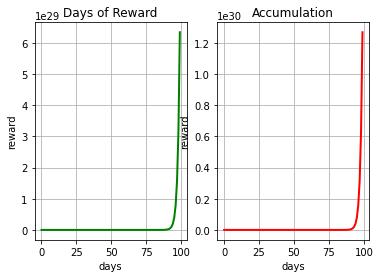

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

days = np.array(range(100)) #[x for x in range(100)]

figure,(Left, Right) = plt.subplots(ncols=2)

Left.plot(days, res_reward2, linewidth=2, color='green')
Left.set_title('Days of Reward')
Left.set_xlabel('days')
Left.set_ylabel('reward')
Left.grid(True)

# Right.hist(days, res_reward3, bins=100, cumulative=True)
Right.plot(days, res_reward3, linewidth=2, color='red')
Right.set_title('Accumulation')
Right.set_xlabel('days')
Right.set_ylabel('reward')
# Right.set_ylim(0, 1000)
Right.grid(True)

figure.show()

### 【問題2】100日目以外の米粒の数

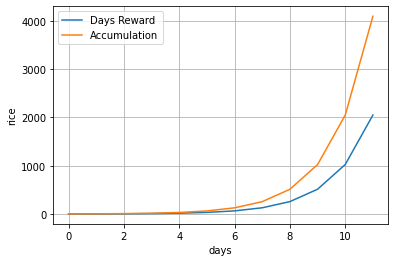

In [38]:
# 関数実行
init = 1
days= 12

res_reward1, res_reward2, res_reward3 = reward(init, days)

plt.title('')
plt.xlabel("days")
plt.ylabel("rice")
plt.plot(res_reward2, label='Days Reward')
plt.plot(res_reward3, label='Accumulation')
plt.legend()
plt.grid(True)
plt.show()

### 【問題3】貰える米で何人が何日生活できるか
>
> + 1日の成人男性の消費カロリー：2200kcal
>
> cf. [実践食育ナビ（農林水産省）](https://www.maff.go.jp/j/syokuiku/zissen_navi/balance/required.html#:~:text=%E6%B4%BB%E5%8B%95%E9%87%8F%E3%81%AE%E5%B0%91%E3%81%AA%E3%81%84%E6%88%90%E4%BA%BA,%E3%81%A0%E3%81%91%E3%80%8D%E9%A3%9F%E3%81%B9%E3%81%9F%E3%82%89%E3%82%88%E3%81%84%E3%81%AE%E3%81%8B%E3%80%82)
>
> + 米１粒のカロリー：72cal
>
> cf. [ご飯一粒のカロリーっていくらなの？](http://dorisyamoji.seesaa.net/article/425381046.html)

In [64]:
def life_line(init, member, days):
    RICE = 72 #[cal]
    consumption = 2200000 #消費量[cal]
    
    accumulation, _, _ = reward(init, days)   
    
    total_accumulation = accumulation*RICE
    
    arrive = total_accumulation/consumption
    arrive_days = total_accumulation/(arrive*consumption)
    
    dic = total_accumulation/member    
    dic_days = total_accumulation/(member*consumption)
    
    return arrive, arrive_days, dic, dic_days

In [65]:
init = 1
member = ['Tominaga', 'Ogawa', 'Terui', 'Sasano', 'Go', 'Haruyama', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b','H']
dic_tarm = 120

arrive, arrive_days, dic, dic_days = life_line(init, len(member), dic_tarm)

print('{0:.2f}人が{1:.2f}日生活できる。'.format(arrive, arrive_days))


if ((len(member)*2200000)*dic_tarm) < dic_days:
    print('DICの', len(member), '人が', dic_tarm, '日間 お腹いっぱいに生活できる。')
else:
    print('{0:.2f}人が{1:.2f}日生活できる。'.format(dic, dic_days))

19603748726339250748396370095802136101653984206389248.00人が1.00日生活できる。
DICの 15 人が 120 日間 お腹いっぱいに生活できる。
